This notebook follows the exercise described at the end of the video https://www.youtube.com/watch?v=CQveSaMyEwM

<b> The exercise brief is as follows: </b>


From sklearn.datasets load digits dataset and do the following:
- Classify digits (0-9) using KNN classifier. You can use different values for k neighbours and need to figure out a value of k that gives a maximum score. You can manually try different vlues of k or use gridsearchcv
- Plot confusion matrix
- Plot classification report

<b> About the dataset: </b>
https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html
This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.

First up i'll load in the dataset, libraries etc

In [3]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

Then i import the dataset into an array that i can work with

In [5]:
digits = load_digits()

In [84]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

I next want to view the <b>feature names</b>

In [6]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

then i want to see the <b> shape of the dataset </b>

And then i want to view the <b> target names </b>

In [7]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
import matplotlib.pyplot as plt

Below we can see an example of what the data looks like. For '8' we can see it plots the 'pixels' to look like the corresponding value

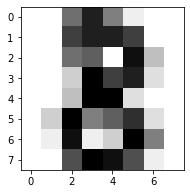

In [80]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[8], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()


<b> now getting back to look at the data-set </b>

In [30]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [31]:
df.shape

(1797, 64)

Shows there are 1797 rows and 64 columns. The rows are the data entries and the columns are the <b> features </b>

Next i want to view the <b> targets</b>

In [39]:
df['target']= digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [41]:
df.shape

(1797, 65)

Remeber head by default only shows the top 5 rows

Now i want to look at the data grouped by <b> target </b>

In [42]:
df[df.target==1].head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1


In [47]:
df[df.target==9].head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9
19,0.0,0.0,6.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,16.0,16.0,13.0,11.0,1.0,9
29,0.0,0.0,9.0,13.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,7.0,12.0,12.0,12.0,11.0,0.0,9
31,0.0,0.0,2.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,15.0,13.0,14.0,13.0,2.0,9
37,0.0,0.0,13.0,10.0,1.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,13.0,13.0,15.0,16.0,13.0,0.0,9


This data only has targets 0-9

Plotting all the targets on a 2-d graph isn't going to work as ther are more than 2 features but using the ploted image above we can conceptually imagine it

<b> Implementing K-Nearest Neighbour </b>


In [48]:
from sklearn.model_selection import train_test_split 

Now i want to drop the target column from the df to set the x and y values

In [81]:
X = df.drop(['target'], axis ='columns')
y = df.target

Next i want to <b> split </b> up the x and y values into a training and test set

In [50]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

We can see how large the x training and testing sets are

In [52]:
len(X_train)

1437

In [51]:
len(X_test)

360

Next we are going to run the <b> K Nearest Neighbour Classifier </b>

In [53]:
from sklearn.neighbors import KNeighborsClassifier

Next i'll set the k number run knn

In [78]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Next i will calculate the accuracy score of the calculations

In [79]:
knn.score(X_test,y_test)

0.9972222222222222

I will show the accuracy break down in the <b> confusion matrix </b>

In [64]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

cm= confusion_matrix(y_test, y_pred)
cm

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

I will then plot this using <b> matplotlib </b> and <b> seaborn </b>

Text(42.0, 0.5, 'Truth')

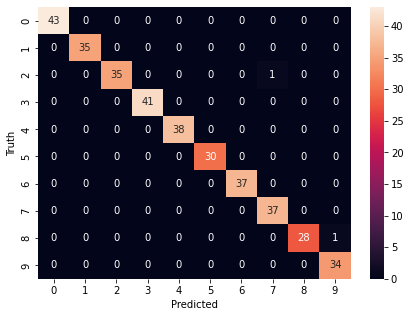

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize= (7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [60]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      0.97      0.99        36
           3       1.00      1.00      1.00        41
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        37
           8       1.00      0.97      0.98        29
           9       0.97      1.00      0.99        34

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



<b> RESOLUTION: </b>
https://github.com/codebasics/py/blob/master/ML/17_knn_classification/Exercise/knn_exercise_digits_solution.ipynb

Did really well, my k-number was better than theirs oi oi :)

> more useful demos in that git repo

<b> Follow up: </b>
Look more into how to get the best k-value
- GridSearchCV https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
- K-Fold cross validation : https://machinelearningmastery.com/k-fold-cross-validation/)
- Feature selection, data validation/pre-processing etc